Sound clip is 8.4 seconds long
44100
11025
[ 0.00019077  0.         -0.00057232  0.          0.00057232  0.
 -0.00019077] [  1.          -5.75762085  13.81952654 -17.69984205  12.7586072
  -4.9076899    0.78701906]
(370440,)
21


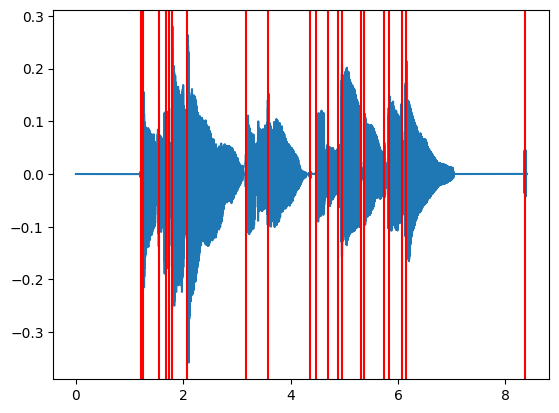

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, cheby1

import librosa


y, fs = librosa.load("recordings/black.wav", sr=None)

y = librosa.to_mono(y)

print(f"Sound clip is {len(y)/fs} seconds long")
print(fs)
window_size = int(fs* 0.25)

print(window_size)

# f0 = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
# print(f0)

order = 3
low = 60.0
high= 900.0
b,a = butter(order, [low, high], fs=fs, btype='band')
# b, a = cheby1(order, 0.5, [low, high], fs=fs, btype='band')
print(b, a)




y[np.abs(y) < 0.03] = 0

filtered_sound = lfilter(b, a ,y)
y = filtered_sound



# maxim = np.max(y)
# y = y/maxim
# print(maxim)
onset_frames = librosa.onset.onset_detect(y=y)
onset_samples = librosa.frames_to_samples(onset_frames)


print(y.shape)

print(len(onset_samples))

time_disc = np.linspace(0, len(y)/ fs, num=len(y))
plt.plot(time_disc,y)
# plt.plot(time_disc, filtered_sound, color="red")
# y = filtered_sound




for sample in onset_samples:
    plt.axvline(x=sample/fs, color="red")


plt.show()

1655.3549762155023


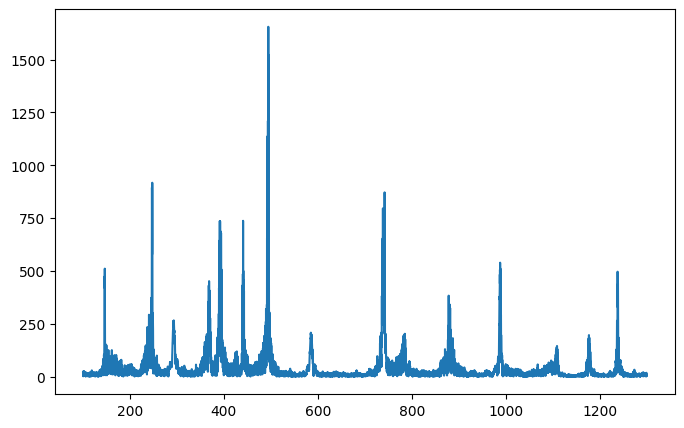

In [21]:
fft_frequencies = np.fft.rfftfreq(len(y), 1/fs)
sound_fft = np.fft.rfft(y)  

maxim = np.max((np.abs(sound_fft)))

print(maxim)
# maxim = np.max(np.abs(sound_fft))
# thresholding 

plt.figure(figsize=(8,5))
plt.plot(np.where((fft_frequencies > 100) & (fft_frequencies < 1300), fft_frequencies, None) , np.abs(sound_fft))
# plt.plot(fft_frequencies , np.abs(sound_fft))



In [33]:

class Note:
    def __init__(self, freq, amplitude, notation):
        self.freq = freq
        self.amplitude = amplitude
        self.time = 0
        self.notation = notation

    def __str__(self):
        return f"freq: {self.freq}, amplitude: {self.amplitude}, "

    def __repr__(self):
        return f"freq: {self.freq}, amplitude: {self.amplitude},"


def heuristic(notes: Note):
    max_amplitude = 0
    freq = 0     
    for note in notes:
        if note.amplitude > max_amplitude and note.freq < 700:
            freq = note.freq
            max_amplitude = note.amplitude
    if freq != 0:
        check_fundamental = librosa.hz_to_note(round(freq/2, 2))

        for note in notes:
            if note.notation == check_fundamental:
                return check_fundamental
        else:
            return librosa.hz_to_note(freq)
    return None

def find_fundamental_frequency(fft, fft_frequencies):
    thrershold = 0.015
    notes = []
    for j in range(len(fft)):
        amplitude = np.abs(fft[j])/maxim
        freq = round(fft_frequencies[j], 2)
        if amplitude < thrershold :
            continue
        if amplitude > thrershold: 
            new_note = Note(freq, round(amplitude,2), librosa.hz_to_note(freq))
            notes.append(new_note)

    if notes == []:
        return None
    for n in notes:
        print(n.freq , n.notation, ":", n.amplitude, end =" || ")
    # print()
    return notes
notes = []

for i in range(0, len(onset_samples) -1):
    window = y[onset_samples[i]: onset_samples[i+1]]
    if len(window)/fs < 0.09:
        continue
    fft_frequencies = np.fft.rfftfreq(len(window), 1/fs)
    fft = np.fft.rfft(window)
    notes_from_sequence = find_fundamental_frequency(fft, fft_frequencies)
    if notes_from_sequence != None:
        note = heuristic(notes_from_sequence)
        if note:
            notes.append(note)
        print(i)
        # print(librosa.hz_to_note(notes_from_sequence[0]))

final_window = y[onset_samples[-1]:]
fft_frequencies = np.fft.rfftfreq(len(final_window), 1/fs)
fft = np.fft.rfft(final_window)
notes_from_sequence = find_fundamental_frequency(fft, fft_frequencies)
if notes_from_sequence != None:
    print(i)


print("notes: ",  notes)    


227.39 A♯3 : 0.02 || 230.84 A♯3 : 0.02 || 234.28 A♯3 : 0.02 || 237.73 A♯3 : 0.04 || 241.17 B3 : 0.07 || 244.62 B3 : 0.09 || 248.06 B3 : 0.12 || 258.4 C4 : 0.02 || 261.84 C4 : 0.02 || 275.62 C♯4 : 0.02 || 289.41 D4 : 0.02 || 489.23 B4 : 0.02 || 492.68 B4 : 0.11 || 496.12 B4 : 0.09 || 499.57 B4 : 0.03 || 740.74 F♯5 : 0.04 || 744.19 F♯5 : 0.03 || 1236.87 D♯6 : 0.07 || 1240.31 D♯6 : 0.03 || 1243.76 D♯6 : 0.02 || 1
274.06 C♯4 : 0.02 || 281.89 C♯4 : 0.02 || 289.72 D4 : 0.05 || 297.55 D4 : 0.04 || 305.38 D♯4 : 0.02 || 313.21 D♯4 : 0.02 || 587.27 D5 : 0.07 || 876.99 A5 : 0.03 || 2
147.14 D3 : 0.02 || 150.73 D3 : 0.02 || 161.5 E3 : 0.02 || 168.68 E3 : 0.02 || 172.27 F3 : 0.02 || 179.44 F3 : 0.02 || 183.03 F♯3 : 0.02 || 226.1 A3 : 0.02 || 229.69 A♯3 : 0.02 || 236.87 A♯3 : 0.02 || 240.45 B3 : 0.02 || 351.71 F4 : 0.02 || 355.3 F4 : 0.04 || 358.89 F4 : 0.06 || 362.48 F♯4 : 0.08 || 366.06 F♯4 : 0.08 || 369.65 F♯4 : 0.16 || 373.24 F♯4 : 0.04 || 376.83 F♯4 : 0.02 || 380.42 F♯4 : 0.02 || 703.42 F5 : 0.